# TITANIC - Proyecto Ciencia de Datos

## Objetivo del Proyecto y Comprensión del Dataset

El objetivo general de este proyecto es encontrar el modelo con mejor performance, utilizando para ello la metodología CRISP-DM, donde abordamos cada etapa del ciclo de vida de un proyecto de Ciencia de Datos.



---


En el dataset de Titanic las variables disponibles son:

*   **PassengerId:** identificador único del pasajero.
*   **Survived:** si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). **Esta es la variable target que interesa predecir.**
*   **Pclass:** clase a la que pertenecía el pasajero: 1, 2 o 3.
*   **Name:** nombre del pasajero.
*   **Sex:** sexo del pasajero.
*   **Age:** edad del pasajero.
*   **SibSp:** número de hermanos, hermanas, hermanastros o hermanastras en el barco.
*   **Parch:** número de padres e hijos en el barco.
*   **Ticket:** identificador del billete.
*   **Cabin:** identificador del camarote asignado al pasajero.
*   **Embarked:** puerto en el que embarcó el pasajero, (C: Cherbourg, Q: Queenstown, S: Southampton.)
*   **Fare:** precio pagado por el billete.

Carga del Dataset y primera exploración

In [ ]:
# Importamos las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Carga del dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
# Obtenemos las dimensiones del dataset
titanic.shape

(891, 12)

In [ ]:
# Contamos los posibles registros duplicados excluyendo la variable ID
titanic.drop("PassengerId", axis = 1).duplicated().sum()

0

In [ ]:
# Exploramos la estructura, tipos de datos de cada variable y la cantidad de valores no nulos por variable
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Contamos los valores nulos del dataset por cada variable
conteo_valores_nulos =titanic.isna().sum()
print(conteo_valores_nulos)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Conclusiones preliminares:

Existen un total de 890 filas (pasajeros) y 12 columnas, entre las que encontramos la variable objetivo o clase a predecir, **Survived**.

No hay registros duplicados.

La variable Cabin solo tiene 204 instancias con valores, lo que representa solo el 23% del total de los registros. La variable Age también cuenta con valores nulos, pero en un número mucho más reducido que el anterior al igual que la variable Embarked. El resto de variables cuentan siempre con valor.

El dataset tiene  7 variables numéricas y 5 variables categóricas.

## Modificaciones al set de datos y Feature Engeenering

In [ ]:
# Hacemos una copia del dataset origial
df1 = titanic.copy()

Imputamos los datos faltantes de las caractaristicas previamente identificadas

In [ ]:
# Rellenamos los datos faltantes de la variable "Age" con algoritmo de imputacion KNN
from sklearn.impute import KNNImputer # Importamos libreria
imputer = KNNImputer(n_neighbors=5) # Instanciamos el imputador

df1['Age'] = imputer.fit_transform(df1[['Age']]).round() # Hacemos la imputación

In [ ]:
# Rellenamos los datos faltantes de la variable "Embarked" con el valor mas frecuente
df1['Embarked'].fillna('S', inplace=True)

Hacemos una eliminación controlada de aquellas variables que consideramos que el algoritmo no va a utilizar en el proceso predictivo, estas son PassengerId, Name, Ticket y Cabin.


In [ ]:
df1 = df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

El dataset contiene dos variables que representan los acompañantes de un pasajero.
Por un lado, SibSp contabiliza el número de hermanos que acompañaban al pasajero (incluyendo a su cónyuge, si aplica),y por otro, Parch contabiliza el número de acompañantes que eran padres e hijos.
Uniendo estas dos variables y sumándolas podemos obtener una tercera, que nos informa sobre los acompañantes de un pasajero determinado, sin distinción entre los vínculos que pudieran tener.

In [ ]:
# Agrupamos las viariables Parch y SibSp en un una nueva denominada "Relatives"
relatives = df1['Parch'] + df1['SibSp']
df1['Relatives'] = relatives
df1 = df1.drop(['Parch','SibSp'],axis=1)

In [ ]:
# Visualizamos la nueva estructura del set de datos y validamos que no contenga datos nulos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   Relatives  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


Manejo de Outliers

In [ ]:
# Hacemos analisis descriptivos de las variables
df1.describe()

,Survived,Pclass,Age,Fare,Relatives
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.754209,32.204208,0.904602
std,0.486592,0.836071,13.000828,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,30.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,10.000000


 El analisis descriptivo de las variables nos indica que todo parece normal, salvo para la columna Fare que tiene una media de 32,20 pero su percentil del 50% es 14,45 y su valor máximo es 512,32. Podríamos decir que 512 parece ser un valor atípico, pero podría ser un error de transcripción.

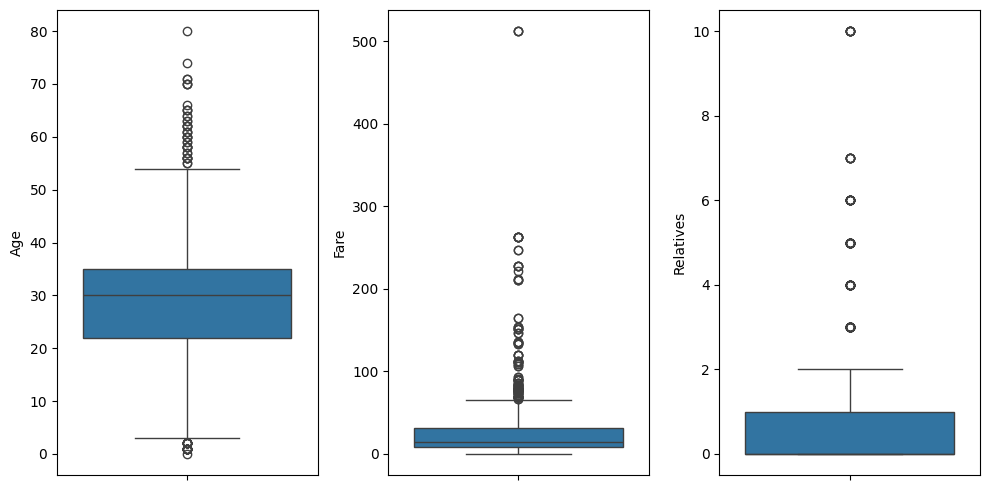

In [ ]:
# Visualisamos con diagramas de caja los posibles outliers
fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.boxplot(ax = axis[0], data = df1, y = "Age")
sns.boxplot(ax = axis[1], data = df1, y = "Fare")
sns.boxplot(ax = axis[2], data = df1, y = "Relatives")


plt.tight_layout()

plt.show()

Podemos visualizar fácilmente que las tres variables estan afectadas por outliers. En el caso de la variable Fare, parece que la tarifa del billete de 512 dólares no es muy común. Deberíamos establecer algunos límites superior e inferior para determinar si un punto de datos debe considerarse o no un valor atípico.

In [ ]:
# Calculamos el rango intercuartilico de la variable Fare
fare_iqr = df1["Fare"].quantile(0.75) - df1["Fare"].quantile(0.25)
# Establecemos los limites superior e inferior
upper_limit = df1["Fare"].quantile(0.75) + 1.5 * fare_iqr
lower_limit = df1["Fare"].quantile(0.25) - 1.5 * fare_iqr
# Imprimimos resultado
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 65.63 y -26.72, con un rango intercuartílico de 23.09


Basándonos en estos resultados, deberíamos eliminar los registros de los pasajeros cuyo importe de billete supere los 65 dólares. Sin embargo, nuestro criterio y según los precios que vimos en el diagrama de caja, los valores más extremos están por encima de 300. Veamos cuántos valores representan ese valor extremo de 300

In [ ]:
df1[df1["Fare"] > 300]

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives
258,1,1,female,35.0,512.3292,C,0
679,1,1,male,36.0,512.3292,C,1
737,1,1,male,35.0,512.3292,C,0


En este caso vemos que todos ellos sobrevivieron, quizá sí que hay un impacto real sobre el precio de billete tan elevado y la supervivencia final. Por lo tanto, sumado al análisis univariante anterior, existe una implicación entre el precio del billete y el resultado final de supervivencia, por lo que decidimos que mantenemos los valores atípicos.

Transformamos las columnas categoricas a numericas utilizando el transformador One Hot Encoder

In [ ]:
# Importamos librerias
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Hacer columnas para One Hot Encoder
transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex','Embarked']),
    remainder='drop')

transformed = transformer.fit_transform(df1)

transformer.get_feature_names_out()

array(['onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S'], dtype=object)

In [ ]:
transformed_df = pd.DataFrame(
    transformed, # Datos del dataframe
    columns=transformer.get_feature_names_out().tolist() # nombres de las columnas
)

# Mostrar info
transformed_df.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [ ]:
df = pd.concat([transformed_df, df1.drop(['Sex','Embarked'],axis=1)],axis=1)
df.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,Survived,Pclass,Age,Fare,Relatives
0,0.0,1.0,0.0,0.0,1.0,0,3,22.0,7.2500,1
1,1.0,0.0,1.0,0.0,0.0,1,1,38.0,71.2833,1
2,1.0,0.0,0.0,0.0,1.0,1,3,26.0,7.9250,0


## Evaluación inicial de los modelos


RandomForest

In [ ]:
# Descargamos la librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# Definir X (características) e y (variable objetivo)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(max_depth=4, random_state=5)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo RF: {accuracy:}")

print(classification_report(y_test, y_pred))

# Obtener las probabilidades predichas para la clase positiva
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calcular el puntaje AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el puntaje AUC
print(f"Puntaje AUC: {auc_score}")


Accuracy del modelo RF: 0.8338983050847457
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       187
           1       0.85      0.67      0.75       108

    accuracy                           0.83       295
   macro avg       0.84      0.80      0.81       295
weighted avg       0.84      0.83      0.83       295

Puntaje AUC: 0.8853980986333927


KN Neighbors Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Define las columnas de características (X) y la columna objetivo (y)
X = df.drop('Survived', axis=1)  # Reemplaza con las columnas de tu DataFrame
y = df['Survived']  # Reemplaza con la columna objetivo

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # Ajusta test_size y random_state según sea necesario

# Crea un clasificador KNN con k=5 (puedes ajustar k)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrena el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN: {accuracy}")

print(classification_report(y_test, y_pred))

# Predecir las probabilidades para la clase positiva
y_probs = knn.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el AUC
print(f"Puntaje AUC del modelo KNN: {auc_score}")

Accuracy del modelo KNN: 0.7288135593220338
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       175
           1       0.69      0.60      0.64       120

    accuracy                           0.73       295
   macro avg       0.72      0.71      0.71       295
weighted avg       0.73      0.73      0.73       295

Puntaje AUC del modelo KNN: 0.7854761904761904


Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define las características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crea un modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy) del modelo: {accuracy}")

print(classification_report(y_test, y_pred))

# Obtener las probabilidades predichas para la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular el puntaje AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el puntaje AUC
print(f"Puntaje AUC Modelo RL: {auc_score}")

Precisión (Accuracy) del modelo: 0.8135593220338984
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       175
           1       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295

Puntaje AUC Modelo RL: 0.8795714285714287


## Analisis y manejo de Outliers Multivariado

Evaluaremos cuatro algoritmos de aprendizaje automático no supervisado para la detección de anomalías y seleccionaremos el que nos proporcione un mejor perfomance utilizando para su medición el error medio absoluto de cada modelo (MAE)

Isolation Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error

# Define las características (X) y la variable objetivo (y)
data_x = df.drop('Survived', axis=1).values
data_y = df['Survived'].values
X, y = data_x, data_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape, y_train.shape)

# identificar outliers en el dataset de train
iso = IsolationForest(contamination=0.05) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)

# seleccionar todas las filas que no son outliers
mask = yhat != -1 # filtro
X_train, y_train = X_train[mask, :], y_train[mask]

# Ajustar modelo
model = LinearRegression()
model.fit(X_train, y_train)
# evaluar el modelo
yhat = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(623, 9) (623,)
MAE: 0.312


Minimum Covariance Determinant

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error

data_x_mcd = df.drop('Survived', axis=1).values
data_y_mcd = df['Survived'].values
X, y = data_x_mcd, data_y_mcd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
# identicar outliers con el metodo
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# Seleccionar filas que no son outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# Dataset reusltante luego de limpiar
print(X_train.shape, y_train.shape)
# Ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)
# Obtener predicciones
yhat = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(623, 9) (623,)
(616, 9) (616,)
MAE: 0.314


Local Outlier Factor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error

data_x_lof = df.drop('Survived', axis=1).values
data_y_lof = df['Survived'].values
X, y = data_x_lof, data_y_lof
X, y = data_x_lof, data_y_lof
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)

# identicar outliers en train
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# seleccionar filas que no son outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

# dataset resultante luego del filtro
print(X_train.shape, y_train.shape)

# ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# evaluar el modelo
yhat = model.predict(X_test)

# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(623, 9) (623,)
(551, 9) (551,)
MAE: 0.314


One Class - SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error

data_x_svm = df.drop('Survived', axis=1).values
data_y_svm = df['Survived'].values
X, y = data_x_svm, data_y_svm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, y_train.shape)
# identicar outliers en train
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# Seleccionar filas que no son outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# dataset resultante tamaño
print(X_train.shape, y_train.shape)
# Ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)
# evaluar el modelo
yhat = model.predict(X_test)
# evaluar predicciones
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(623, 9) (623,)
(617, 9) (617,)
MAE: 0.313


Cuadro comparativo MAE de los modelos

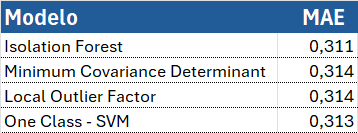

---


Elegiremos el Isolation Forest ya que arrojó el mejor performance (MAE) ademas de la menor cantidad de outliers con menor impacto en la integridad de los datos.

In [ ]:
# Eliminamos los valores atipicos detectados en el Dataset por el modelo, para obtener un nuevo conjunto de datos sin outliers

iso = IsolationForest(contamination=0.05) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(df)

# seleccionar todas las filas que no son outliers
mask = yhat != -1 # filtro
df_no_outliers = df[mask]
df_no_outliers = df_no_outliers.reset_index(drop=True)

# dataset resultante tamaño
print(df_no_outliers.shape)

(846, 10)


Probaremos nuevamente el preformance de los modelos con el set de datos sin outliers **df_no_outliers**

## Evaluacion de los modelos con datos sin outliers

Random Forest

In [ ]:
# Define las características (X) y la variable objetivo (y)
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(max_depth=4, random_state=5)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo RF: {accuracy:}")

print(classification_report(y_test, y_pred))

# Obtener las probabilidades predichas para la clase positiva
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calcular el puntaje AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el puntaje AUC
print(f"Puntaje AUC: {auc_score}")

Accuracy del modelo RF: 0.8071428571428572
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       170
           1       0.83      0.65      0.72       110

    accuracy                           0.81       280
   macro avg       0.81      0.78      0.79       280
weighted avg       0.81      0.81      0.80       280

Puntaje AUC: 0.8655614973262034


KN Neighbors Classifier

In [ ]:
# Define las columnas de características (X) y la columna objetivo (y)
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # Ajusta test_size y random_state según sea necesario

# Crea un clasificador KNN con k=5 (puedes ajustar k)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrena el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN: {accuracy}")

print(classification_report(y_test, y_pred))

# Predecir las probabilidades para la clase positiva
y_probs = knn.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el AUC
print(f"Puntaje AUC del modelo KNN: {auc_score}")

Accuracy del modelo KNN: 0.6964285714285714
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       186
           1       0.54      0.59      0.56        94

    accuracy                           0.70       280
   macro avg       0.66      0.67      0.67       280
weighted avg       0.70      0.70      0.70       280

Puntaje AUC del modelo KNN: 0.7516014641958362


Regresión Logistica

In [ ]:
# Define las características (X) y la variable objetivo (y)
X = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crea un modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy) del modelo: {accuracy}")

print(classification_report(y_test, y_pred))

# Obtener las probabilidades predichas para la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular el puntaje AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el puntaje AUC
print(f"Puntaje AUC Modelo RL: {auc_score}")

Precisión (Accuracy) del modelo: 0.7785714285714286
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       186
           1       0.64      0.77      0.70        94

    accuracy                           0.78       280
   macro avg       0.76      0.78      0.76       280
weighted avg       0.79      0.78      0.78       280

Puntaje AUC Modelo RL: 0.8629032258064516


Cuadro comparativo de la metrica AUC

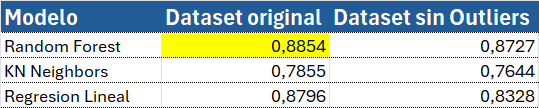

Al comparar la AUC de cada modelo con los entrenados con el set de datos sin outliers observamos que su performance disminuyo para cada modelo con respecto a al desempeño del modelo con el set de datos completo (Modelo inicial).
De tal forma que decidimos trabajar el modelo de clasificacion sin la aplicación de algoritmos de deteccion de outliers.

## Reduccion de la dimensionalidad

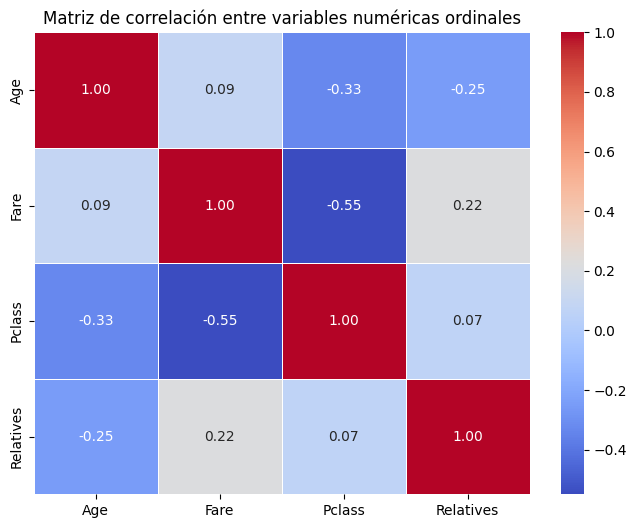

In [ ]:
# Creamos matriz de correlación para vusualizar si podemos hacer reducción de la dimensionalidad.
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables predictoras ordinales
ord_features = ['Age', 'Fare', 'Pclass', 'Relatives']

# Crear matriz de correlación
correlation_matrix = df[ord_features].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas ordinales')
plt.show()

La matriz de correlación nos confirma una correlacion alta entre las variables Pclass y Fare.

Esta correlación será explicada mediante una tecnica de reduccion de la dimensionalidad PCA y evaluaremos su impacto en el performance del modelo.

Aplicamos PCA

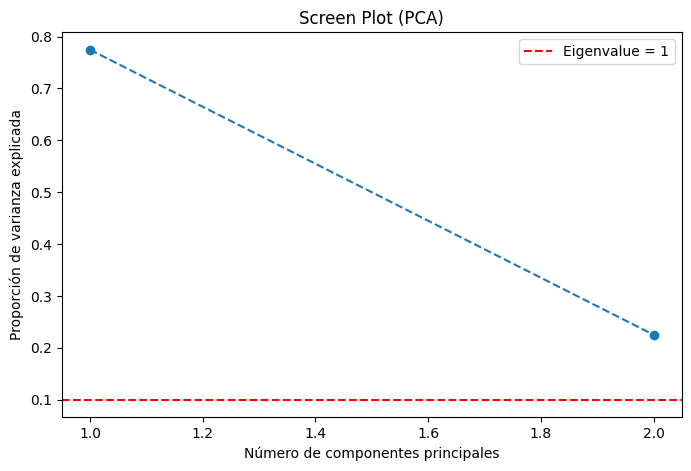

Varianza explicada por cada componente:
[0.77474981 0.22525019]
Varianza explicada acumulada:
[0.77474981 1.        ]

Cargas de los componentes principales:
             PC1       PC2
Fare   -0.707107  0.707107
Pclass  0.707107  0.707107


In [ ]:
# Importamos librerias
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar las variables del modelo
variables = ['Fare', 'Pclass']
df_num = df[variables]

# Escalar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Aplicar PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Proporción de varianza explicada
explained_variance = pca.explained_variance_ratio_

# Screen Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.title('Screen Plot (PCA)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.1, color='r', linestyle='--', label="Eigenvalue = 1")
plt.legend()
plt.show()

# Varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
print(explained_variance)

# Varianza acumulada
varianza_acumulada = explained_variance.cumsum()
print("Varianza explicada acumulada:")
print(varianza_acumulada)


# Cargas de los componentes principales
cargas = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(explained_variance))], index=variables)
print("\nCargas de los componentes principales:")
print(cargas)

El 77% de la varianza de las variables analizadas es explcada por el primer componente principal (PCA).

In [ ]:
# Usaremos un solo componente para entrenar los diferentes modelos y evaluar su perfomance
components = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])
df_pca = pd.concat([df, components], axis=1)
df_pca = df_pca.drop(['PC2'], axis=1)
df_pca = df_pca.drop(variables, axis=1)

## Evaluacion de los Modelos con reduccion de dimensionalidad (PCA)

Random Forest con PCA

In [ ]:
# Define las características (X) y la variable objetivo (y)
X = df_pca.drop('Survived', axis=1)
y = df_pca['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(max_depth=4, random_state=5)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo RF con PCA: {accuracy:}")

print(classification_report(y_test, y_pred))

# Obtener las probabilidades predichas para la clase positiva
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calcular el puntaje AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el puntaje AUC
print(f"Puntaje AUC del modelo RF con PCA: {auc_score}")

Accuracy del modelo RF con PCA: 0.8271186440677966
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       187
           1       0.83      0.67      0.74       108

    accuracy                           0.83       295
   macro avg       0.83      0.79      0.80       295
weighted avg       0.83      0.83      0.82       295

Puntaje AUC del modelo RF con PCA: 0.8679936621113092


KN Neighbors con PCA

In [ ]:
# Define las columnas de características (X) y la columna objetivo (y)
X = df_pca.drop('Survived', axis=1)
y = df_pca['Survived']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # Ajusta test_size y random_state según sea necesario

# Crea un clasificador KNN con k=5 (puedes ajustar k)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrena el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo KNN con PCA: {accuracy}")

print(classification_report(y_test, y_pred))

# Predecir las probabilidades para la clase positiva
y_probs = knn.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el AUC
print(f"Puntaje AUC del modelo KNN con PCA: {auc_score}")

Accuracy del modelo KNN con PCA: 0.7864406779661017
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       175
           1       0.79      0.64      0.71       120

    accuracy                           0.79       295
   macro avg       0.79      0.76      0.77       295
weighted avg       0.79      0.79      0.78       295

Puntaje AUC del modelo KNN con PCA: 0.8543095238095237


Regresion Logistica con PCA

In [ ]:
# Define las características (X) y la variable objetivo (y)
X = df_pca.drop('Survived', axis=1)
y = df_pca['Survived']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Crea un modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo RL con PCA: {accuracy}")

print(classification_report(y_test, y_pred))

# Obtener las probabilidades predichas para la clase positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular el puntaje AUC
auc_score = roc_auc_score(y_test, y_probs)

# Imprimir el puntaje AUC
print(f"Puntaje AUC Modelo RL con PCA: {auc_score}")

Accuracy del modelo RL con PCA: 0.8101694915254237
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       175
           1       0.80      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295

Puntaje AUC Modelo RL con PCA: 0.8762380952380953


Evaluacion del performance de los modelos con PCA

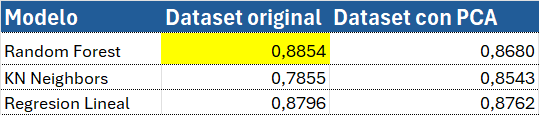

Utilizamos igualmente la metrica AUC de cada modelo para evaluar su desempeño comparando el set de datos original con el set de datos con PCA. Observamos una mejora significativa en el rendimiiento del modelo KNN, no obstante, el modelo Random Forest con el set de Datos original es el que sigue mostrando un mejor desempeño y en consecuencia es el modelo elegido como algoritmo de clasificacion de supervivencia.

## Hypertuning para selección de Hyperparametros para el modelo de clasificacion selecccionado

In [ ]:
# Hypertuning del Modelo RandomForest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir X (características) e y (variable objetivo)
X = df.drop('Survived', axis=1)
y = df['Survived']

params_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion':['entropy','gini']
        }

grid_cv = RandomizedSearchCV(RandomForestClassifier(), params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros modelo RF", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros modelo RF {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Mejor score de CV 0.818816303740927
Accuracy del modelo = 0.79661


In [ ]:
# Modelo de ml random forest parametrizado

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Definimos las características (X) y la variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Intanciamos el modelo con los parametros especificados
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=2,
                                  max_features='log2',
                                  criterion='gini',
                                  random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo elegido: {accuracy:}")
print("\nReporte de clasificación modelo elegido:")
print(classification_report(y_test, y_pred))

Accuracy del modelo elegido: 0.8067796610169492

Reporte de clasificación modelo elegido:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       175
           1       0.81      0.68      0.74       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.79       295
weighted avg       0.81      0.81      0.80       295



## Performance del modelo seleccionado y Curva ROC - AUC

roc_auc_score para el Modelo Random Forest:  0.8820952380952382


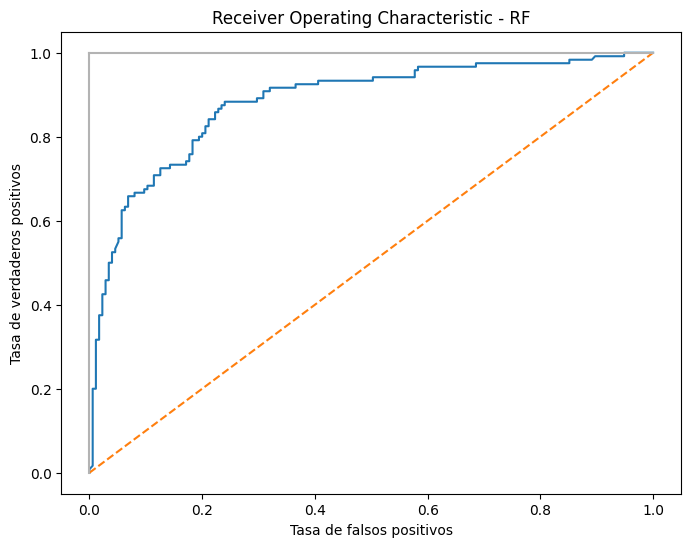

In [ ]:
# Calcular y plotear la Curva ROC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = rf_model.predict_proba(X_test)[:,1]

# Calculo de tasas
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score para el Modelo Random Forest: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - RF')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

## Conclusiones:

1.   Random Forest es el modelo con mejor rendimiento medido por la metrica AUC.
2.   Se debe ahondar en la interpretación de los diferentes modelos para una selección adecuada de optimizacion de acuerdo a la naturaleza del problema evaluado.
3.   Existen oportunidades de mejoras al analisis preliminar aqui planteado.

